# Using color in your visualizations
> Color is a powerful tool for encoded values in data visualization. However, with this power comes danger. In this chapter, we talk about how to choose an appropriate color palette for your visualization based upon the type of data it is showing. This is the Summary of lecture "Improving Your Data Visualizations in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Visualization]
- image: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## Color in visualizations
- How color is used
    - Differentiates classes of data
    - Encodes continuous values
    - Should be used carefully
- Color can be misleading...
> "It is evident that the color-size illusion is present in a marked degree (no matter what) arrangement" - C.J Warden & E.L. Flynn, 1926

### Getting rid of unnecessary color
You might want to compare the relationship CO to NO2 values across cities using a simple scatter plot with color to differentiate the different cities' data.


In [2]:
pollution = pd.read_csv('./dataset/pollution_wide.csv')
pollution.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


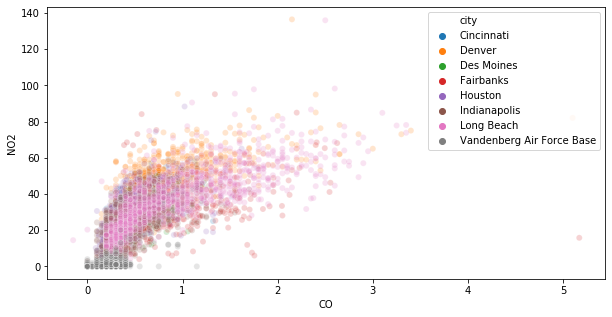

In [3]:
sns.scatterplot('CO', 'NO2',
                alpha = 0.2,
                hue = 'city',
                data = pollution);

Unfortunately, the resulting plot is very convoluted. It's hard to make out differences between the cities because one has to differentiate between similar colors. It turns out that sometimes the best color palette for your plot is no color at all.

To remedy this hard-to-read chart, get rid of the color component and facet by each city. While the resulting plot may not be as pretty, it will be a much better tool to decipher the differences.

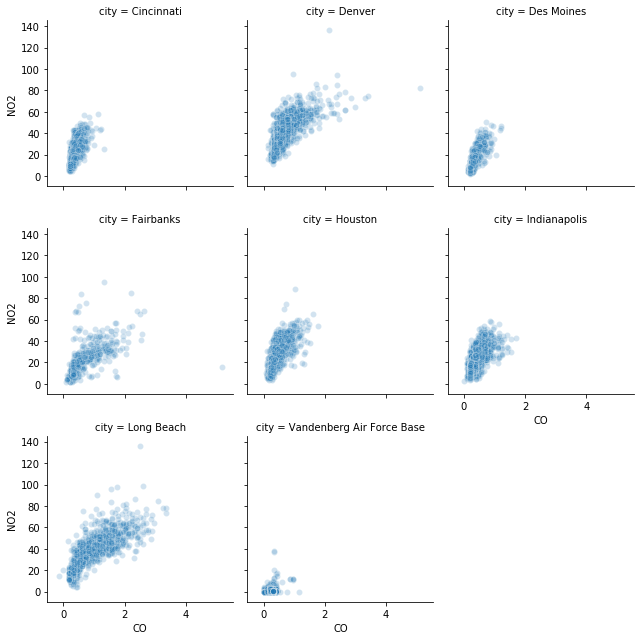

In [4]:
# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot, 'CO', 'NO2', alpha = 0.2);

This new faceted plot removes the pretty colors but becomes a whole lot more informative. In certain situations, if you can take something that is encoded in color and encode it in position instead, you often will increase the legibility of your chart. The balance between attractiveness and utility is something you need to balance in every plot you make.

### Fixing Seaborn's bar charts
Seaborn's default values for the colors of bars in a bar chart are not ideal for the most accurate perception. By drawing each bar as a different color, there is a risk of the viewer seeing two identical sized bars as different sizes as people tend to see some colors as 'larger' than others.

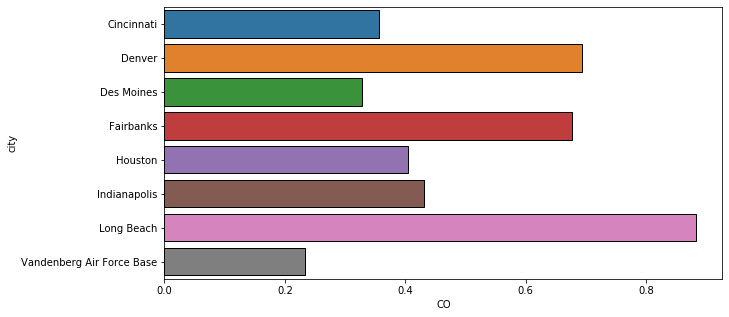

In [5]:
sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Add a border to the bars
            edgecolor = 'black');

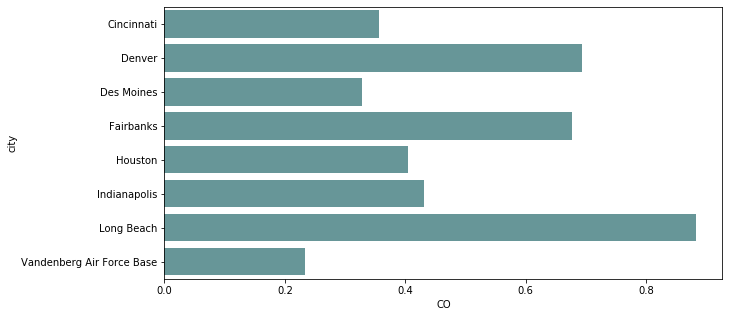

In [6]:
sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Replace border with bar colors
            color = 'cadetblue');

Adding borders is an easy and quick way to improve default bar charts without sacrificing some of the trippy colors. Spending a tiny bit more time to adjust the default colors will result in a more accurate and easy to read chart.

## Continuous color palettes
- Continuous 
    - Ordered
    - Lots of possible values \
    (e.g. Distances, Sensor Readings, Volumes)
- Not Continuous
    - No order or.
    - Few possible values
    (e.g. Categories, Relative Scales, Binary Values)

### Making a custom continuous palette
You are interested in the pollution levels of Cincinnati for the year 2014. Specifically, you're interested in CO and NO2, so you make a simple scatter plot to show the relationship between the two pollutants.

In [7]:
# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")

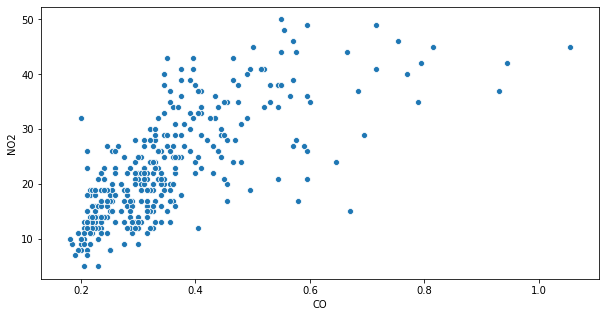

In [8]:
sns.scatterplot(x='CO', y='NO2', data=cinci_2014);

However, there may be some interesting information in how the value of O3 relates to the two plotted pollutants, so you decide to color the points by their O3 levels. To do this, you need to define an appropriate continuous palette and map your O3 column to it in your scatter plot.

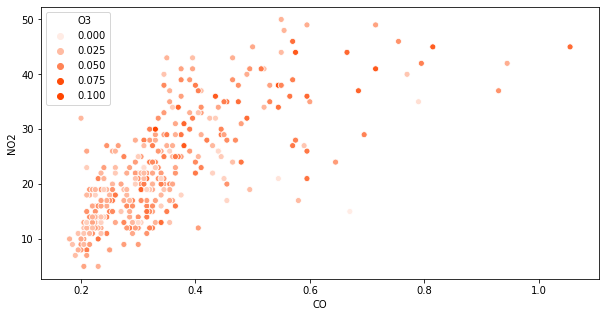

In [9]:
# Define a custom continuous color palette
color_palette = sns.light_palette('orangered',
                         as_cmap = True);

# Plot mapping the color of the points with custom palette
sns.scatterplot(x = 'CO',
                y = 'NO2',
                hue = 'O3', 
                data = cinci_2014,
                palette = color_palette);

Judging by the plot, there doesn't appear to be much of an association of $O_3$ to either $CO$ or $NO_2$. By adding color to this simple scatter plot, you added a large amount of information on a previously un-visualized variable to the chart while still maintaining high precision in your main goal of comparing the $CO$ and $NO_2$ values to each other.

### Customizing a diverging palette heatmap
The default color scheme used by Seaborn's `heatmap()` doesn't give the value of 0 any special treatment. This is fine for instances when 0 isn't special for the variable you're visualizing but means you will need to customize the palette when 0 is special, such as when it represents a neutral value.

For this visualization, you want to compare all the cities against the average pollution value for CO in November 2015. (As is provided in the DataFrame `nov_2015_CO`).

To do this, use a heat map to encode the number of standard deviations away from the average each city's CO pollution was for the day. You'll need to replace the default palette by creating your own custom diverging palette and passing it to the heatmap and informing the function what your neutral value is.

In [10]:
nov_2015_CO = pd.read_csv('./dataset/nov_2015_CO.csv', index_col=0)
nov_2015_CO

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
city,,,,,,,,,,,,,,,,,,,,,
Cincinnati,NaN,NaN,NaN,NaN,NaN,-0.743307,-0.679369,-0.449591,-0.402636,0.166813,...,-0.493548,-0.256777,0.293691,0.432556,-0.114914,-0.750300,-0.770281,-0.674374,-0.919137,-0.546497
Denver,-0.047979,0.851152,-0.247786,-0.047979,-0.247786,-0.147883,0.651345,0.651345,0.651345,1.650379,...,-0.247786,0.251731,1.750282,0.951055,0.751248,-0.647400,-0.647400,-0.547496,-0.447593,-0.247786
Fairbanks,-0.207825,-0.407631,0.811190,0.281702,0.171808,-0.487554,0.071905,-0.377660,0.081895,1.160852,...,NaN,NaN,NaN,-0.477564,0.851152,-0.157873,0.861142,0.611383,2.339712,2.030012
Houston,-0.615430,-0.002024,-0.304731,-0.482559,-0.857197,-0.597448,-0.906149,-0.886169,-0.226806,0.089888,...,-0.744306,0.387600,0.167812,-0.155875,-0.904151,-0.959098,-0.928128,-0.781270,-0.842211,-0.476565
Indianapolis,0.551441,1.050958,2.049992,0.851152,-0.647400,-0.847206,-0.647400,0.151828,0.051924,0.051924,...,-0.547496,-0.647400,-0.647400,1.150862,-0.547496,-0.847206,-0.847206,-0.947110,-0.947110,-0.647400
Long Beach,1.750282,-0.247786,-0.347689,0.351635,0.551441,1.450572,2.649413,1.950089,0.951055,-0.247786,...,3.148930,1.050958,2.049992,1.650379,-0.847206,1.150862,0.651345,0.651345,0.551441,0.951055
Vandenberg Air Force Base,-1.146917,-1.246820,-1.146917,-0.947110,-0.947110,-0.947110,-0.947110,-0.947110,-0.747303,-0.747303,...,-0.947110,-0.847206,-0.747303,-0.847206,-0.947110,-0.947110,-0.947110,-0.947110,-0.947110,-0.947110


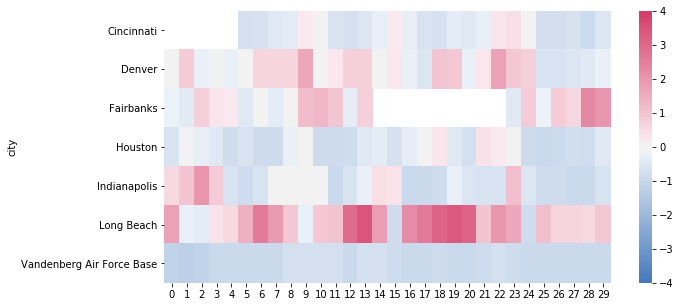

In [12]:
# Define a custom palette
color_palette = sns.diverging_palette(250, 0, as_cmap=True)

# Pass palette to plot and set axis ranges
sns.heatmap(nov_2015_CO,
            cmap=color_palette,
            center=0,
            vmin=-4,
            vmax=4
           );
plt.yticks(rotation=0);

Instantly, you can see that Vandenberg Air Force Base always has below average CO values whereas Long Beach, especially towards the end of the month, has much higher than average values. By correctly mapping the zero-point of our values you can immediately pick out patterns in our data in the context of a meaningful data anchor-point.

### Adjusting your palette according to context
You've been asked to make a figure for your company's website. The website has a slick black theme, and it would be pretty jarring if your plot were white. To make your plot match the company aesthetic, you can swap the background to a black one with `plt.style.use("dark_background")`.

The figure you've been asked to make plots O3 values during October 2015 for various cities (provided as oct_2015_o3). You will plot this as a heatmap with the color of each cell encoding how many standard deviations from the overall average O3 value the measurement falls. Due to the website's dark background, you will want to adjust your color palette to encode null value (or 0 standard deviations from the mean) as dark rather than the default white.

In [14]:
oct_2015_o3 = pd.read_csv('./dataset/oct_2015_O3.csv', index_col=0)
oct_2015_o3.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
city,,,,,,,,,,,,,,,,,,,,,
Cincinnati,-0.570906,-0.648050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Denver,-0.185183,-0.185183,-0.185183,-0.493761,-0.262327,-1.728075,-0.108038,0.740553,-0.339472,-0.030894,...,-1.959509,-0.725195,0.354830,0.431974,-0.648050,-0.030894,0.123396,-1.265207,-0.956629,0.277685
Des Moines,-0.378044,-0.185183,-0.185183,-1.033774,-0.725195,-0.725195,0.393402,0.316257,-0.069466,0.277685,...,-0.416617,-1.188063,-0.262327,0.123396,-0.030894,-1.265207,NaN,NaN,NaN,NaN
Fairbanks,-0.956629,-1.573786,-1.650931,-1.728075,-1.728075,-2.036654,-1.573786,-0.725195,-0.802340,-1.110918,...,-1.882364,-1.728075,-2.036654,-1.959509,-2.422377,-2.190943,-1.188063,-1.188063,-0.648050,-0.570906
Houston,1.049131,1.203420,1.049131,0.817697,0.509119,1.357710,1.897722,1.511999,1.434854,0.971986,...,-0.262327,-0.570906,-0.262327,-0.262327,-0.802340,-0.185183,0.509119,1.820577,0.046251,-0.879484


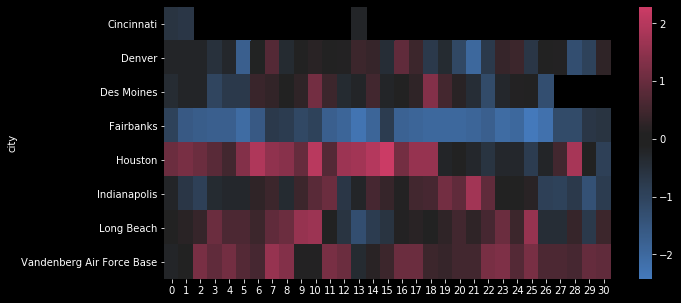

In [16]:
# Dark plot background
plt.style.use("dark_background")

# Modify palette for dark background
color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)

# Pass palette to plot and set center
sns.heatmap(oct_2015_o3,
            cmap = color_palette,
            center = 0);
plt.yticks(rotation = 0);

Not only does the black background make this chart look very cool, it helps the patterns really pop out. Furthermore, matching the null-value to the background of the chart makes it much more natural to read. You can easily see that Fairbanks has much lower than average O3 pollution values than the rest of the cities and that Houston has much higher values, especially in the earlier days of the month.